# Regression of Simple Datasets

### Linear Regression

Function: [***LinearRegression***](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) in scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

X_LR = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y_LR = np.dot(X_LR, np.array([1, 2])) + 3

# display the data for density estimation
print("This is the dataset:\n X =\n {} \n \n y = {} \n".format(X_LR, y_LR))

# Linear regression model

lin_reg = LinearRegression().fit(X_LR, y_LR)

# output R^2 of the 
print(lin_reg.score(X_LR, y_LR))
# output the coefficients in the regression model
print(lin_reg.coef_)
# output the constant term "b" in the regression model
print(lin_reg.intercept_)

# to print out all these terms together 
print("\nThe regressed model is y ={:3.1f}X0 +{:3.1f}X1 +{:3.1f} with a R2 score of {} \n".format(lin_reg.coef_[0], 
                                                                                                  lin_reg.coef_[1], 
                                                                                                  lin_reg.intercept_,
                                                                                                  lin_reg.score(X_LR, y_LR)))

# make a prediction on the new test data, xtest
X_LR_test = np.array([[1, 3]])
y_LR_test = lin_reg.predict(X_LR_test)

print("With the input of {}, the regression model predicts y = {}".format(str(X_LR_test), y_LR_test[0])) 

This is the dataset:
 X =
 [[1 1]
 [1 2]
 [2 2]
 [2 3]] 
 
 y = [ 6  8  9 11] 

1.0
[1. 2.]
3.0000000000000018

The regressed model is y =1.0X0 +2.0X1 +3.0 with a R2 score of 1.0 

With the input of [[1 3]], the regression model predicts y = 10.0


### Ridge Regression

Function: [***Ridge***](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), [***KernelRidge***](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html) in scikit-learn

In [2]:
# Ridge regression
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge

# randomly generate the data; X is 10 x 3 matrix, and y is a 10-dimensional vector
X_RR = np.random.rand(10, 3)
y_RR = np.random.rand(10)

# perform ridge regression using \alpha, which is the regularization strength
ridge_reg = Ridge(alpha=1.0).fit(X_RR, y_RR)

# alternatively, perform kernel ridge regression (ridge + kernel trick)
ker_ridge_reg = KernelRidge(alpha=1.0).fit(X_RR, y_RR)

# make a predictions on the new test data, xtest, using both methods
X_RR_test = np.array([[1, 2, 3]])
ridge_pred = ridge_reg.predict(X_RR_test)
ker_ridge_pred = ker_ridge_reg.predict(X_RR_test)
print("Ridge regression: {} \nKernel ridge regression: {}".format(ridge_pred, ker_ridge_pred))



Ridge regression: [0.3815612] 
Kernel ridge regression: [1.46844513]


### Gaussian Process

Function: [***GaussianProcessRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html) in scikit-learn


Default Kernel: [***RBF***](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html#sklearn.gaussian_process.kernels.RBF)

Class (all available kernels): [***kernels***](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process)


The Gaussian process regression value at 5.2 is 1.1953



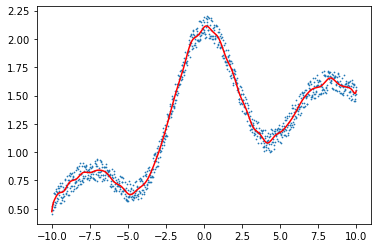

In [3]:
# Gaussian process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# generate 1000 data randomly using a "real" function for X-Y mapping
n = 1000
X_GP = np.linspace(-10, 10, num=n)
y_GP = 1 + X_GP*5E-2 + np.sin(X_GP)/X_GP + 0.2*np.random.rand(n)

# fit a Gaussian process model using the default kernel
gp_reg = GaussianProcessRegressor()
gp_reg.fit(X_GP.reshape(-1,1), y_GP)

# given datapoint
X_test = 5.2   
# get the regression prediction value of this test data point
y_GP_test = gp_reg.predict(np.asarray(X_test).reshape(-1,1))
print("The Gaussian process regression value at {} is {:5.4f}\n".format(X_test, y_GP_test[0]) )

# plot out the regressed value of the entire domain
y_GP_pred = gp_reg.predict(X_GP.reshape(-1,1))
plt.scatter(X_GP, y_GP,s=0.5)
plt.plot(X_GP, y_GP_pred,c='r')
plt.show()

### Support Vector Regression

Function: [***SVR***](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#) in scikit-learn

The Gaussian process regression value at 5.2 is 1.1656



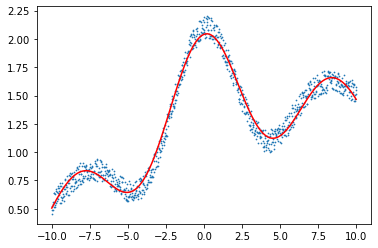

In [4]:

# Import Support Vector Regression
from sklearn.svm import SVR

# fit an SVR model using the default kernel and the previous dataset for GP
svr_reg = SVR()
svr_reg.fit(X_GP.reshape(-1,1), y_GP)

# given datapoint
X_test = 5.2   
# get the regression prediction value of this test data point
y_SVR_test = svr_reg.predict(np.asarray(X_test).reshape(-1,1))
print("The Gaussian process regression value at {} is {:5.4f}\n".format(X_test, y_SVR_test[0]) )

# plot out the regressed value of the entire domain
y_SVR_pred = svr_reg.predict(X_GP.reshape(-1,1))
plt.scatter(X_GP, y_GP,s=0.5)
plt.plot(X_GP, y_SVR_pred,c='r')
plt.show()

# Regression of the Diabetes Dataset

Function: [***datasets***](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) in scikit-learn

There are 342 instances in this dataset.


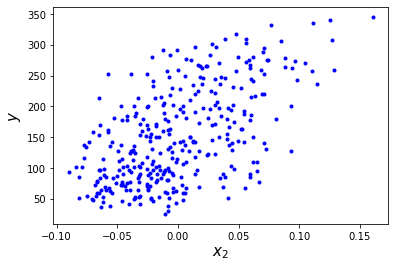

In [5]:
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Select the second feature corresponding to the bmi of the diabetes patients
X=X[:,2].reshape((len(y),1))
y = y.reshape((len(y),1))

# Split the data into training/testing sets
X = X[:-100]          # use all but the last 100 data for training
X_test = X[-100:]     # use the last 100 data for testing 

# Split the targets into training/testing sets
y = y[:-100]         # use all but the last 100 data for training
y_test = y[-100:]    # use the last 100 data for testing 
dim = len(y)
print("There are "+str(dim)+" instances in this dataset.")

# Visualize the data
plt.plot(X, y, "b.")
plt.xlabel("$x_2$", fontsize=15)
plt.ylabel("$y$", fontsize=15)
plt.show()

### Linear Regression with the Normal Equation

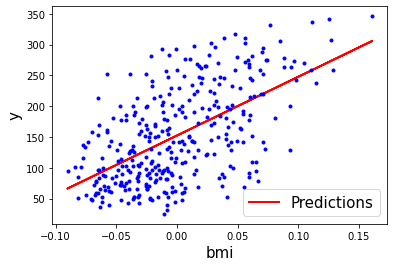

In [6]:
# Add a column of '1' vector to the X matrix
X_exp = np.c_[np.ones((dim, 1)), X]

theta = np.linalg.inv(X_exp.T.dot(X_exp)).dot(X_exp.T).dot(y)
y_predict = X_exp.dot(theta)

# Plot the regression results
plt.plot(X, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("bmi", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.show()

### Linear Regression using Batch Gradient Descent

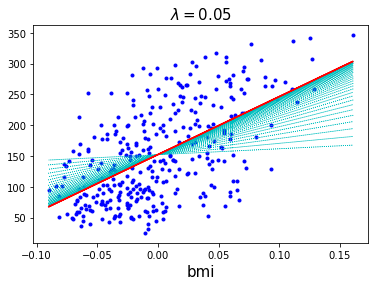

In [7]:
lbda = 0.05   # set the learning rate

theta = np.random.randn(2,1)   # initialize theta
#theta[1,:]=0

plt.plot(X, y, "b.")

n_iterations = 20000   # Maximum iteration numbers

for iteration in range(n_iterations):
    if iteration%500 == 0 and iteration > 10:
        y_predict = X_exp.dot(theta)
        plt.plot(X, y_predict, "c:", linewidth=0.8 )    
    gradient = 2/dim * X_exp.T.dot(X_exp.dot(theta) - y)
    theta = theta - lbda * gradient
    
y_predict = X_exp.dot(theta)

plt.plot(X, y_predict, "r-")
plt.xlabel("bmi", fontsize=15)  
plt.title(r"$\lambda = {}$".format(lbda), fontsize=15)
plt.show()

In [8]:
# define a function to perform the  gradient descent and plotting tasks

def plot_gradient_descent(theta, lbda):
    plt.plot(X, y, "b.")
    n_iterations = 20000
    thetas = []            # collection of all theta values over the iterations
    
    for iteration in range(n_iterations):
        if iteration%500 == 0 and iteration >0:
            y_predict = X_exp.dot(theta)
            plt.plot(X, y_predict, "c:", linewidth=0.8 )    
        gradient = 2/dim * X_exp.T.dot(X_exp.dot(theta) - y)
        theta = theta - lbda * gradient
        thetas.append(theta)
        
    y_predict = X_exp.dot(theta)
    plt.plot(X, y_predict, "r-")
    plt.xlabel("bmi", fontsize=15)
    
    plt.title(r"$\lambda = {}$".format(lbda), fontsize=15)
    return thetas

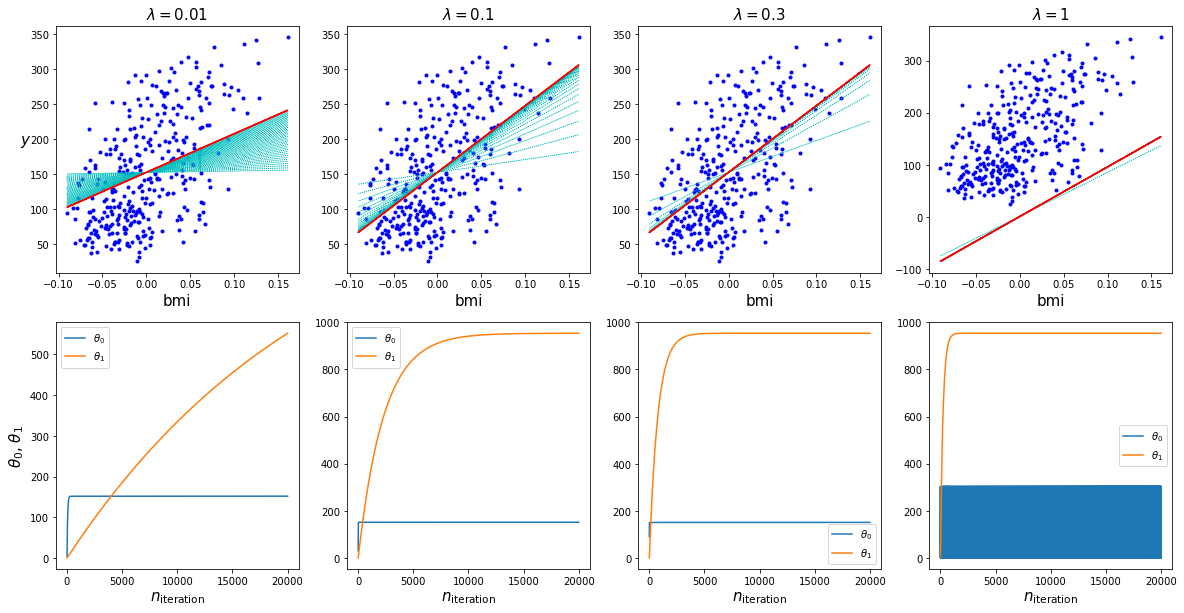

In [9]:
# Initialize theta
theta = np.random.randn(2,1)

plt.figure(figsize=(20,10))

plt.subplot(241)
plt.ylabel("$y$", rotation=0, fontsize=15)
predictions_010 = plot_gradient_descent(theta, lbda=0.01)
plt.subplot(242)
predictions_100 = plot_gradient_descent(theta, lbda=0.1)
plt.subplot(243)
predictions_300 = plot_gradient_descent(theta, lbda=0.3)
plt.subplot(244)
predictions_1000 = plot_gradient_descent(theta, lbda=1)

plt.subplot(245)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
plt.ylabel("$\\theta_0$, $\\theta_1$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_010])
theta1, = plt.plot([i[1] for i in predictions_010])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])
plt.subplot(246)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_100])
theta1, = plt.plot([i[1] for i in predictions_100])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])
plt.subplot(247)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_300])
theta1, = plt.plot([i[1] for i in predictions_300])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])
plt.subplot(248)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_1000])
theta1, = plt.plot([i[1] for i in predictions_1000])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])

plt.show()

### Linear Regression using Stochastic Gradient Descent

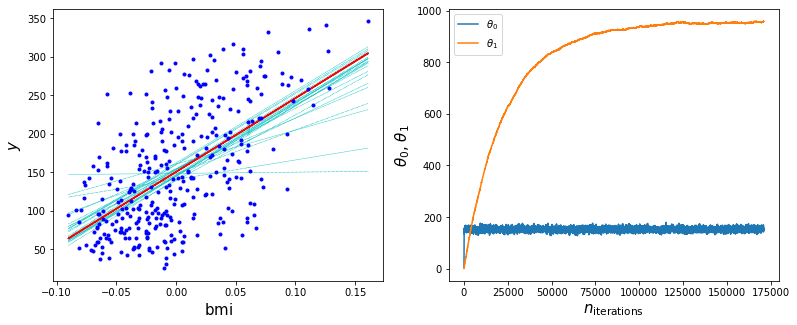

In [10]:
# Stochastic Gradient Descent

n_epochs = 500   # number of epochs

lbda = 0.01   # set the learning rate
        
thetas = []

plt.figure(figsize=(13, 5))
plt.subplot(121)

# loop over the number of epochs
for epoch in range(n_epochs):
    # And a loop over the size of the training data
    for i in range(dim):
        # Pick a random data instance as xi, yi
        random_index = np.random.randint(dim)
        xi = X_exp[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        # Calculate gradients based on this data instance
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - lbda * gradients
        thetas.append(theta)
    # plot a line for every few epochs
    if epoch%20 == 0:
        y_predict = X_exp.dot(theta)
        plt.plot(X, y_predict, "c:", linewidth=0.5 )    

y_predict = X_exp.dot(theta)

plt.plot(X, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$\mathrm{bmi}$", fontsize=15)
plt.ylabel("$y$", fontsize=15)

plt.subplot(122)
theta0, = plt.plot([i[0] for i in thetas])
theta1, = plt.plot([i[1] for i in thetas])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])

plt.xlabel("$n_{\mathrm{iterations}}$", fontsize=15)
plt.ylabel("$\\theta_0$, $\\theta_1$", fontsize=15)
plt.show()

### Linear Regression with Ridge Regularization

Function: [***train_test_split***](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) in scikit-learn

Function: [***mean_squared_error***](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) in scikit-learn

In [11]:
# Prepare the training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Add a column of '1' vector to the X matrix
X_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_test = np.c_[np.ones((len(X_test), 1)), X_test]

# Estimate theta values
theta = np.linalg.inv(np.transpose(X_train).dot(X_train)).dot(X_train.T).dot(y_train)

# Check the performance on the test dataset
from sklearn.metrics import mean_squared_error

y_predict = X_test.dot(theta)
mse_linreg = mean_squared_error(y_predict, y_test)
print("MSE = %s" % mse_linreg)

MSE = 5366.446329251444


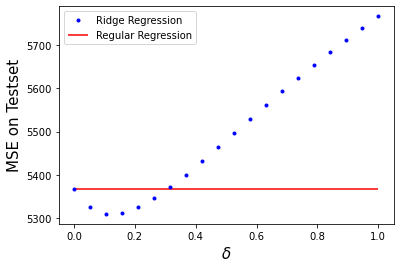

In [12]:
# Ridge Regression

thetas_r = []
mses = []
deltas = np.linspace(0, 1, 20)

for delta in deltas:
    # Compute estimators
    theta = np.linalg.inv(X_train.T.dot(X_train)+delta*np.eye(np.shape(X_train)[1])).dot(X_train.T).dot(y_train)
    thetas_r.append(theta)
    # Compute their MSE
    mses.append(mean_squared_error(X_test.dot(theta), y_test))
    
plt.plot(deltas,mses,'b.', label="Ridge Regression")
plt.hlines(mse_linreg, 0, 1, "r", label="Regular Regression")
plt.xlabel("$\delta$", fontsize=15)
plt.ylabel("MSE on Testset", fontsize=15)
plt.legend()
plt.show()

### Linear Regression with LASSO Regularization

Function: [***Lasso***](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) in scikit-learn

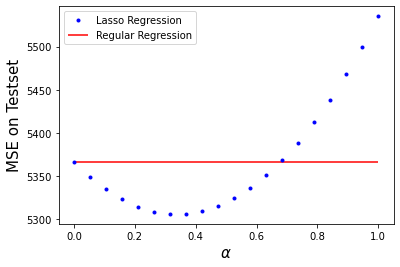

In [13]:
# Lasso Regression

from sklearn.linear_model import Lasso
thetas_l = []
mses = []
alphas = np.linspace(0.00001, 1, 20)

for alpha in alphas:
    lasso_reg = Lasso(alpha)
    # Compute estimators
    lasso_reg.fit(X_train, y_train)
    thetas_l.append(lasso_reg.coef_)
    # Compute their MSE
    mses.append(mean_squared_error(lasso_reg.predict(X_test), y_test))
    
plt.plot(alphas,mses,'b.', label="Lasso Regression")
plt.hlines(mse_linreg, 0, 1, "r", label="Regular Regression")
plt.xlabel(r"$\alpha$", fontsize=15)
plt.ylabel("MSE on Testset", fontsize=15)
plt.legend()
plt.show()

# More on Gaussian Process Regression

Function: [***GaussianProcessRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html) in scikit-learn

Constant Kernel: [***ConstantKernel***](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.ConstantKernel.html#sklearn.gaussian_process.kernels.ConstantKernel)

Class (all available kernels): [***kernels***](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process)


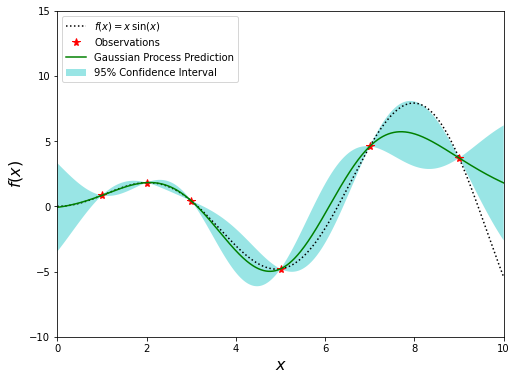

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

#  Input: X; observations: y
X = np.atleast_2d([1, 2, 3, 5, 7, 9]).T
y = (X*np.sin(X)).ravel()

# 1D mesh the input space 
x = np.atleast_2d(np.linspace(0, 10, 1000)).T
fx = x * np.sin(x)

# Build a Gaussian Process model using a customized kernel and fit the data
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp_model.fit(X, y)

model_name = "Gaussian Process"

# Make the prediction on the meshed x-axis 
y_pred, sigma = gp_model.predict(x, return_std=True)


def make_plot(X, y, y_pred, sigma, x, fx):
    # Plot the function, the prediction and the 95% confidence interval from GP
    plt.figure(figsize=(8,6))
    plt.plot(x, fx, 'k:', label='$f(x) = x\,\sin(x)$')
    plt.plot(X, y, 'r*', markersize=8, label='Observations')
    plt.plot(x, y_pred, 'g-', label=model_name+' Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.96 * sigma, (y_pred + 1.96 * sigma)[::-1]]),
             alpha=.4, fc='c', ec='None', label='95% Confidence Interval')
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$f(x)$', fontsize=16)
    plt.xlim(0, 10)
    plt.ylim(-10, 15)
    plt.legend(loc='upper left')
    return

make_plot(X, y, y_pred, sigma, x, fx)
plt.show()

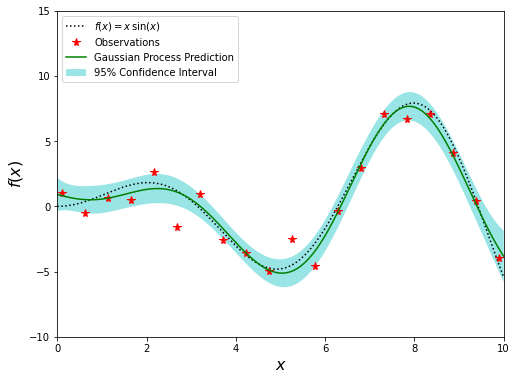

In [15]:
# THE NOISY CASE

X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = (X*np.sin(X)).ravel()
dy = 0.5 + 1 * np.random.random(y.shape)

# Define the noise
np.random.seed(1)
noise = np.random.normal(0, dy)
y += noise

# Build a Gaussian Process model using the same kernel and fit the data
gp_model = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2, n_restarts_optimizer=10)
gp_model.fit(X, y)

# Make the prediction on the meshed x-axis 
y_pred, sigma = gp_model.predict(x, return_std=True)

# Plot the results
make_plot(X, y, y_pred, sigma, x, fx)
plt.show()

# More on Support Vector Regression
Function: [***SVR***](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#) in scikit-learn

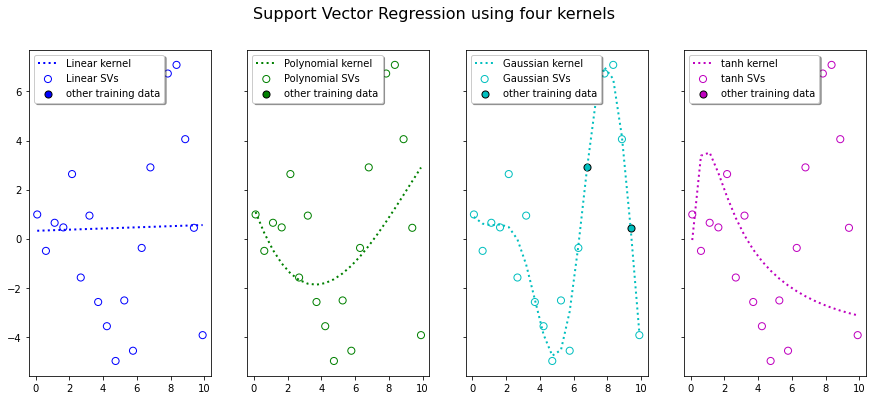

In [16]:
from sklearn.svm import SVR

# Build SVR regression models using four types of kernels
l_svr = SVR(kernel='linear', C=100, gamma='auto')
p_svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
g_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
t_svr = SVR(kernel='sigmoid', C=100, coef0=2)

svrs = [l_svr, p_svr, g_svr, t_svr]
label = ['Linear', 'Polynomial', 'Gaussian', 'tanh']
color = ['b', 'g', 'c', 'm']

fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=4, sharey=True)

# Use the same dataset as above for the fitting
for i, svr in enumerate(svrs):
    # Plot the fitted model
    ax[i].plot(X, svr.fit(X, y).predict(X), ls=':', lw=2, color=color[i], label='{} kernel'.format(label[i]))
    # Plot the support vectors (SVs)
    ax[i].scatter(X[svr.support_], y[svr.support_], facecolor="none", edgecolor=color[i], s=50, label='{} SVs'.format(label[i]))
    # Plot the other data (non-support vectors)
    ax[i].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)], y[np.setdiff1d(np.arange(len(X)), svr.support_)], 
                      facecolor=color[i], edgecolor="k", s=50, label='other training data')
    # Plot a legend box
    ax[i].legend(loc='upper left', bbox_to_anchor=(0., 1.),ncol=1, fancybox=True, shadow=True)

fig.suptitle("Support Vector Regression using four kernels", fontsize=16)
plt.show()

# Ensemble Learning Models for Regression
Function: [***XGBRegressor***](https://xgboost.readthedocs.io/en/stable/python/python_api.html) in XGBoost (scikit-learn wrapper)

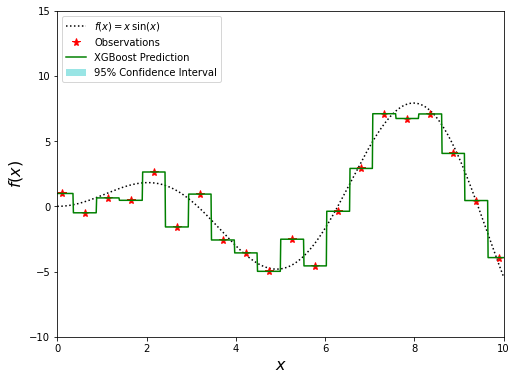

In [17]:
# XGBoost for regression
import xgboost as xgb
model_name = "XGBoost"

# Build a XGBoost model and fit the data
xgb_model = xgb.XGBRegressor(n_jobs=3)
xgb_model.fit(X, y)

# Make the prediction on the meshed x-axis 
y_pred = xgb_model.predict(x)

sigma = np.zeros(sigma.shape)
# Plot the results
make_plot(X, y, y_pred, sigma, x, fx)

Function: [***RandomForestRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) in scikit-learn

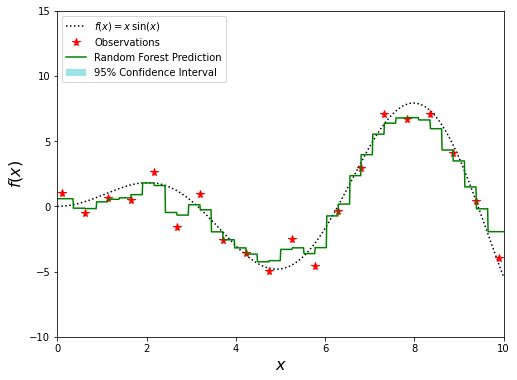

In [18]:
# Random forest for regression
from sklearn.ensemble import RandomForestRegressor
model_name = "Random Forest"

# Build a random forest model and fit the data
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Make the prediction on the meshed x-axis 
y_pred = rf_model.predict(x)

sigma = np.zeros(sigma.shape)
# Plot the results
make_plot(X, y, y_pred, sigma, x, fx)

## Compare Ensemble Learning Models for Regression

Module: [***Ensemble***](https://scikit-learn.org/stable/modules/ensemble.html) in scikit-learn

Functions: [***DecisionTreeRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [***RandomForestRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), [***AdaBoostRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html), [***GradientBoostingRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

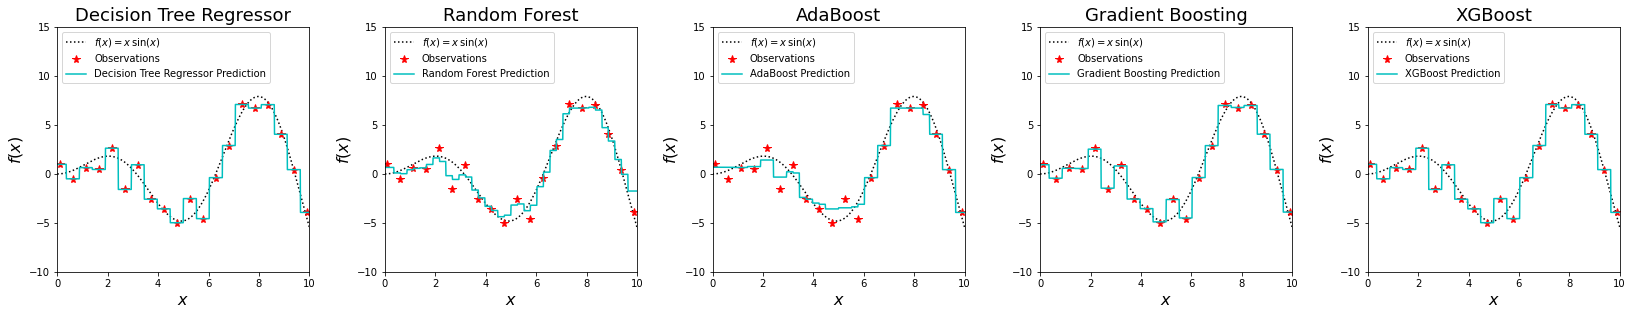

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb

reg_models = (DecisionTreeRegressor(),
              RandomForestRegressor(),
              AdaBoostRegressor(),
              GradientBoostingRegressor(),
              xgb.XGBRegressor(n_jobs=3))

reg_models = (reg.fit(X, y) for reg in reg_models)

# title for the plots
titles = ('Decision Tree Regressor',
          'Random Forest',
          'AdaBoost',
          'Gradient Boosting',
          'XGBoost')
    
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(28,4.5))
fig.subplots_adjust(wspace=0.3)
# set the step size of the mesh grid as h
h = 0.02

for model, title, ax in zip(reg_models, titles, axes):
    y_pred = model.predict(x)
    ax.plot(x, fx, 'k:', label='$f(x) = x\,\sin(x)$')
    ax.plot(X, y, 'r*', markersize=8, label='Observations')
    ax.plot(x, y_pred, 'c-', label=title+' Prediction')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$f(x)$', fontsize=16)
    ax.set_xlim(0,10)
    ax.set_ylim(-10, 15)
    ax.legend(loc='upper left')    
    ax.set_title(title, fontsize=18)
plt.show()

